<a href="https://colab.research.google.com/github/ioanap20/Branch-and-bound-for-TSP/blob/main/medical_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we aim to predict the survival years of cancer patients using machine learning techniques. We begin by analyzing a global cancer patient dataset *(global_cancer_patients_2015_2024.csv)* and apply two models:

**Logistic Regression**

**Random Forest Classifier**

Our goal is to evaluate how accurately these models can estimate survival durations based on available patient features.

After building and testing our models on this dataset, we will repeat the process with another cancer-related dataset *(cancer issue.csv)* . This will allow us to compare the performance and generalizability of both models across different data sources, helping us determine which method is more effective for predicting survival outcomes.

In [5]:

# Import standard libraries for  machine learning
import pandas as pd                  # For data manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For plotting
import seaborn as sns                # For visualizations

# Import the model we'll use
from sklearn.linear_model import LogisticRegression

# Upload CSV file from the computer
from google.colab import files
uploaded = files.upload()

# Load the dataset into a pandas DataFrame
df = pd.read_csv('global_cancer_patients_2015_2024.csv')

#  Display the first few rows of the dataset
df.head()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024 (1).csv


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [6]:
df.tail() #Display the last 5 rows to check how the dataset ends

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54
49999,PT0049999,22,Male,Pakistan,2023,5.1,9.8,3.2,0.0,0.7,Liver,Stage 0,64023.82,7.4,3.76


In [7]:
df.info() # Get a concise summary of the dataset: column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [8]:
df.describe() # Generate summary statistics for all numeric columns (count, mean, std, min, max, quartiles)

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [9]:
df.isnull().sum() # Check for missing values in each column

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0


In [10]:
int(df.duplicated().sum()) # Count the number of duplicate rows in the dataset (converted to a regular integer)

0

In [11]:
df.shape # Show the number of rows and columns in the dataset as a tuple (rows, columns)

(50000, 15)

In [12]:
df.dtypes # Display the data type of each column (e.g., int, float, object)

,0
Patient_ID,object
Age,int64
Gender,object
Country_Region,object
Year,int64
Genetic_Risk,float64
Air_Pollution,float64
Alcohol_Use,float64
Smoking,float64
Obesity_Level,float64


In [13]:
df.columns # List all column names in the dataset

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [14]:
# Print all column names with their corresponding index numbers
for i, col in enumerate(df.columns):
        print(f"{i+1}. {col}")

1. Patient_ID
2. Age
3. Gender
4. Country_Region
5. Year
6. Genetic_Risk
7. Air_Pollution
8. Alcohol_Use
9. Smoking
10. Obesity_Level
11. Cancer_Type
12. Cancer_Stage
13. Treatment_Cost_USD
14. Survival_Years
15. Target_Severity_Score


In [15]:
# Find the maximum age in the dataset
max_age = df['Age'].max()
# Filter the dataset to find the patient(s) with the maximum age
oldest_patients = df[df['Age'] == max_age]
# Display the details of the oldest patient(s)
print(oldest_patients)

      Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
135    PT0000135   89   Other         Brazil  2017           8.4   
164    PT0000164   89   Other         Brazil  2018           7.8   
173    PT0000173   89    Male      Australia  2020           4.0   
177    PT0000177   89   Other         Canada  2020           3.8   
323    PT0000323   89  Female             UK  2020           2.8   
...          ...  ...     ...            ...   ...           ...   
49763  PT0049763   89  Female            USA  2021           0.5   
49766  PT0049766   89   Other         Canada  2023           8.0   
49794  PT0049794   89    Male          India  2017           9.4   
49950  PT0049950   89  Female         Russia  2020           5.5   
49992  PT0049992   89   Other         Brazil  2021           0.6   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
135              3.9          7.1      2.2            1.4        Skin   
164              7.6          8.3    

In [16]:
# Find the minimum age in the dataset
min_age = df['Age'].min()

# Filter the dataset to find the patient(s) with the minimum age
youngest_patients = df[df['Age'] == min_age]

# Display the details of the youngest patient(s)
print(youngest_patients)

      Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  \
75     PT0000075   20    Male          India  2021           2.5   
99     PT0000099   20  Female      Australia  2018           6.6   
131    PT0000131   20    Male         Russia  2015           4.5   
158    PT0000158   20    Male         Brazil  2020           1.2   
190    PT0000190   20  Female             UK  2021           0.4   
...          ...  ...     ...            ...   ...           ...   
49833  PT0049833   20   Other         Russia  2015           0.6   
49917  PT0049917   20   Other             UK  2017           7.5   
49921  PT0049921   20    Male          China  2022           5.0   
49922  PT0049922   20    Male        Germany  2019           4.4   
49953  PT0049953   20    Male            USA  2015           5.2   

       Air_Pollution  Alcohol_Use  Smoking  Obesity_Level Cancer_Type  \
75               0.7          6.4      2.6            3.5    Leukemia   
99               0.5          9.3    

In [17]:
# Create a table showing the number of patients for each cancer type by country/region
region_cancer_counts = df.groupby(['Country_Region', 'Cancer_Type']).size().unstack(fill_value=0)
# Display the first few rows of the resulting table
region_cancer_counts.head()

Cancer_Type,Breast,Cervical,Colon,Leukemia,Liver,Lung,Prostate,Skin
Country_Region,,,,,,,,
Australia,653,632,632,609,670,645,614,637
Brazil,597,622,623,619,627,626,619,671
Canada,581,636,629,636,562,625,581,614
China,615,643,620,590,593,609,619,624
Germany,625,596,626,679,624,657,627,590


In [18]:
# Show summary statistics of severity scores for each smoking level
df.groupby('Smoking')['Target_Severity_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Smoking,,,,,,,,
0.0,253.0,3.918577,1.001618,1.44,3.1600,3.940,4.6900,6.39
0.1,509.0,4.031002,1.046711,0.90,3.2900,4.030,4.7600,7.19
0.2,467.0,4.017859,1.046052,1.23,3.2850,4.020,4.7500,6.69
0.3,486.0,4.023889,1.046589,1.00,3.2700,4.020,4.7475,6.82
0.4,530.0,4.056151,1.029903,1.48,3.3925,4.030,4.8200,6.55
...,...,...,...,...,...,...,...,...
9.6,507.0,5.819329,1.064682,2.71,5.0800,5.830,6.5600,8.80
9.7,457.0,5.909869,1.070095,3.33,5.0700,5.910,6.7300,8.36
9.8,509.0,5.882200,1.030999,2.60,5.2100,5.900,6.5900,8.36


Now we want to understand the data better, we want to find relationships between features. We will do different scatterplots to find these. We want our visualizations to answer relevant questions like "what factors impact survival?", "which cancers are most common?", or "how does risk relate to severity?"

**Age distribution**

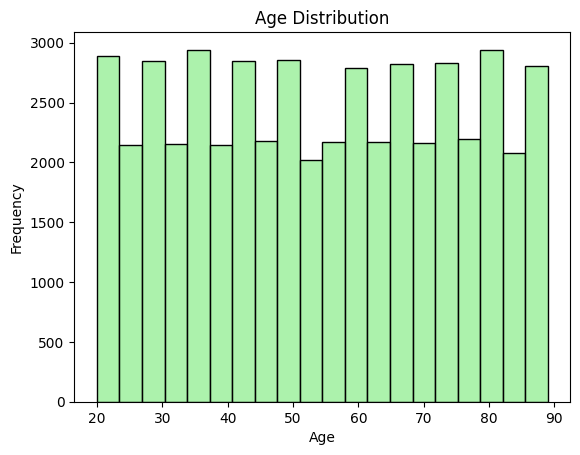

In [34]:
sns.histplot(df['Age'], bins = 20, color="lightgreen")
plt.title("Age Distribution")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

We see that there is no single age range with a dramatically higher frequency, implying the model or study is not skewed toward younger or older patients.

**Gender Distribution**

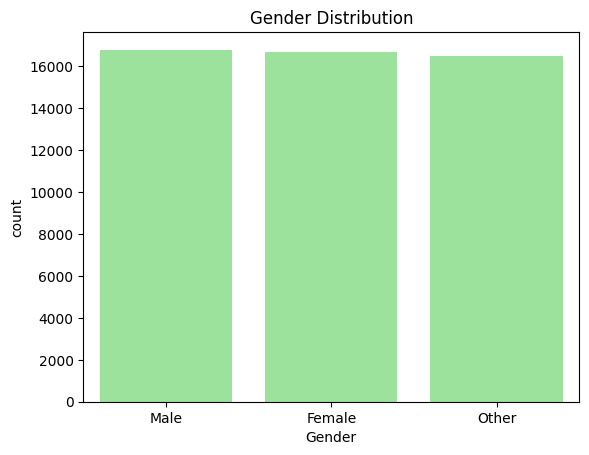

In [35]:
sns.countplot(data=df, x='Gender', color = "lightgreen")
plt.title("Gender Distribution")
plt.show()

This gender distribution bar chart shows that the number of cancer patients in the dataset is nearly equal across all three gender categories: Male, Female, and Other.

**Cancer Types**

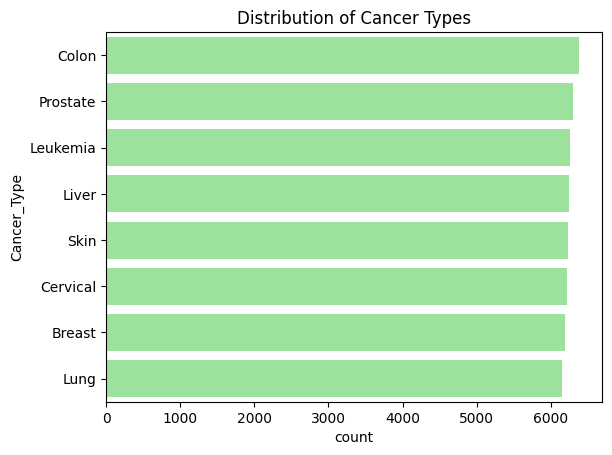

In [42]:
sns.countplot(y='Cancer_Type', data=df, order=df['Cancer_Type'].value_counts().index, color="lightgreen")
plt.title("Distribution of Cancer Types")
plt.show()

We see that colon cancer is slightly more common, but overall there is no dominant cancer type.

**Country**

<ipython-input-45-6a7dc74de695>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


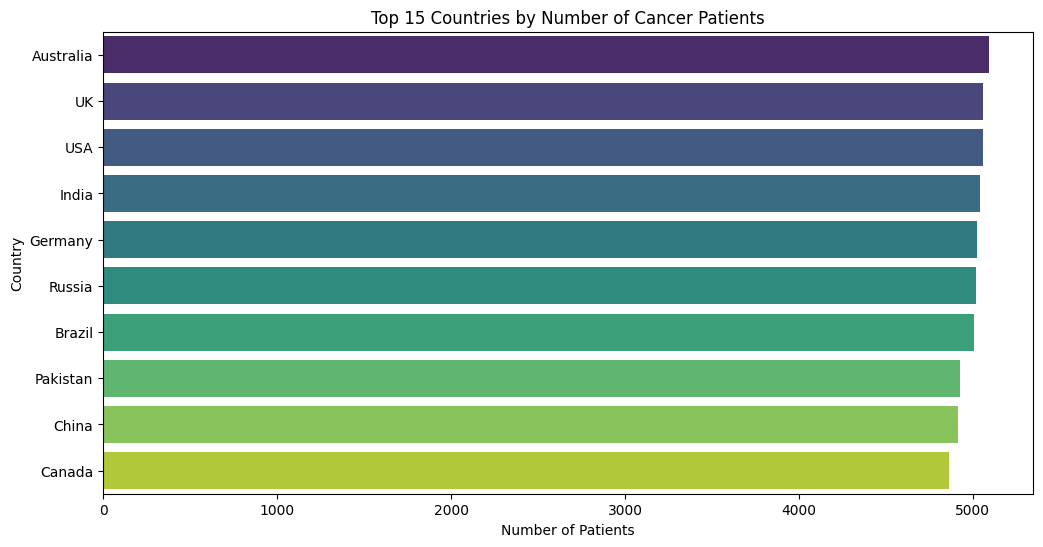

In [45]:
country_counts = df['Country_Region'].value_counts().head(15)  # Top 15 countries

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title("Top 15 Countries by Number of Cancer Patients")
plt.xlabel("Number of Patients")
plt.ylabel("Country")
plt.show()

We see that Australia has more cancer patients, but overall, the number of patients is evenly distributed. There is no bias between countries.

**Cancer Stages**

<ipython-input-53-97a56b165b4f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cancer_Stage', data=df, palette='viridis')


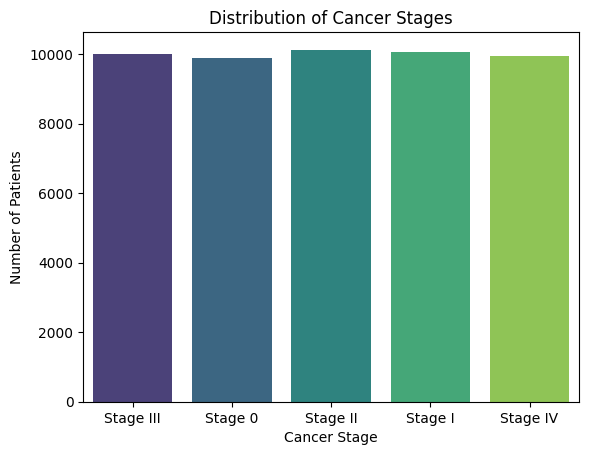

In [53]:
sns.countplot(x='Cancer_Stage', data=df, palette='viridis')
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Number of Patients')
plt.show()

We see that there is no bias between stages, they are evenly distributed.

**Correlation Heatmap risk factors**

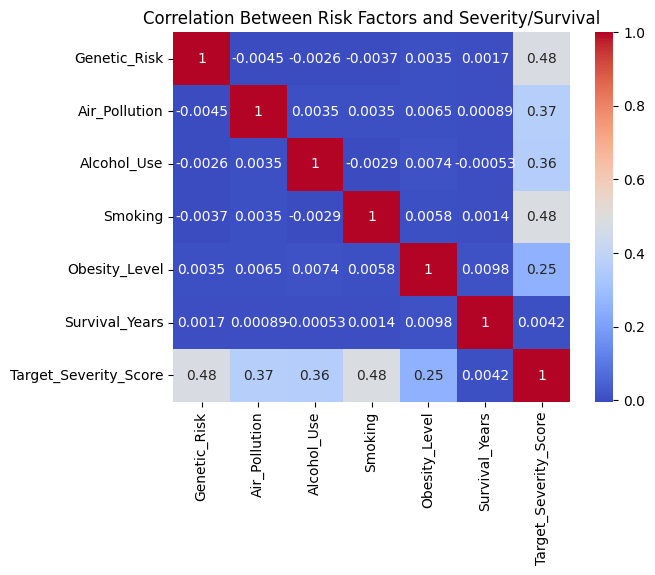

In [49]:
corr = df[['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Survival_Years', 'Target_Severity_Score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Risk Factors and Severity/Survival")
plt.show()

From this correlation graph, we see that the highest is the genetic risk, then the air pollution, the alcohol use, smoking, obesity, and the last one is the suvival years. This seems less intuitive since we would think higher severity, means lower surviva time, but this correlation map shows that the severity score is correlated with the risk factors, but the survival years are not.

**Correlation heatmap numerical features**

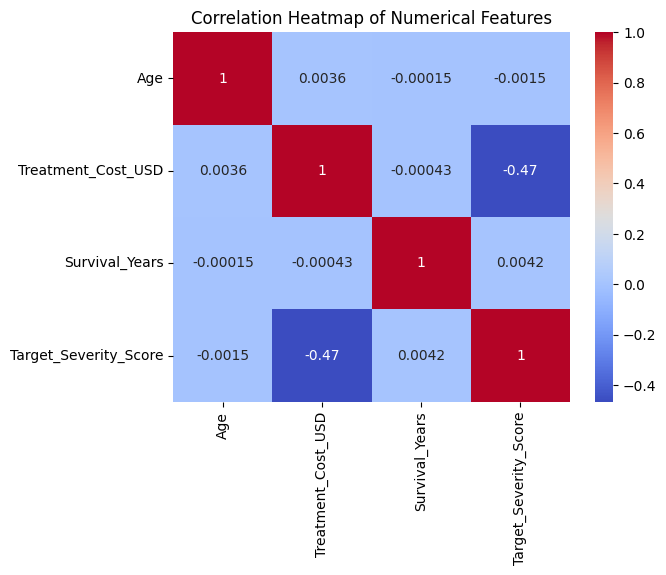

In [52]:
corr = df[['Age', 'Treatment_Cost_USD', 'Survival_Years', 'Target_Severity_Score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

We see that Survival_Years has almost zero correlation with everything and Target_Severity_Score is moderately negatively correlated with Treatment_Cost_USD.

Now we would like to see more clearly the relationships between the survival years and the severity score with the categorical features: Cancer Type, Cancer Stage.